In [2]:
from __future__ import print_function

In [3]:
from openeye import oechem
from openeye import oemedchem

In [4]:
mol = oechem.OEGraphMol()

In [5]:
ifs = oechem.oemolistream()
ofs = oechem.oemolostream()
ifs.SetFormat(oechem.OEFormat_SDF)

True

In [6]:
ifs.open('cdk2.sdf')
ifs.rewind()

In [7]:
mols =[ ]

for m in ifs.GetOEGraphMols():
    newmol = oechem.OEGraphMol(m)
    mols.append(newmol)
print(len(mols))

47


In [8]:
opts = oemedchem.OEMatchedPairAnalyzerOptions()
mmp = oemedchem.OEMatchedPairAnalyzer( opts )

In [9]:
record = 0
for m in mols:
    record += 1
    status = mmp.AddMol(m, record)

In [10]:
print(mmp.NumMatchedPairs())

6


In [11]:
chemctxt = oemedchem.OEMatchedPairContext_AllBonds

In [42]:
extractMode = (oemedchem.OEMatchedPairTransformExtractMode_NoSMARTS+
              oemedchem.OEMatchedPairTransformExtractMode_AddAttachmentPts+
              oemedchem.OEMatchedPairTransformExtractMode_AddMCSCorrespondence)

In [54]:
transforms = []
for mmptransform in oemedchem.OEMatchedPairGetTransforms(mmp,
                                                        chemctxt,
                                                        extractMode):
    transforms.append(mmptransform)

In [55]:
tf1=transforms[0]

In [56]:
from openeye import oedepict
from IPython.display import Image

In [57]:
print(tf1.GetTransform())

[CH3:1][CH:17]([CH3:2])[C@H:19]([CH2:9][OH:26])[NH:24][c:16]1[n:21][c:14]([c:13]2[c:15]([n:22]1)[n:25]([cH:8][n:20]2)[CH:18]([CH3:3])[CH3:4])[NH:23][c:11]3[cH:6][cH:5][c:10]([c:12]([cH:7]3)[Cl:27])C(=O)[O-]>>[CH3:1][CH:17]([CH3:2])[C@H:19]([CH2:9][OH:26])[NH:24][c:16]1[n:21][c:14]([c:13]2[c:15]([n:22]1)[n:25]([cH:8][n:20]2)[CH:18]([CH3:3])[CH3:4])[NH:23][c:11]3[cH:6][cH:5][cH:10][c:12]([cH:7]3)[Cl:27]


In [58]:
w,h=400,300
image = oedepict.OEImage(w,h)
qmol = oechem.OEGraphMol()
oechem.OEParseSmiles(qmol,tf1.GetTransform())

True

In [59]:
oedepict.OEPrepareDepiction(qmol)

True

In [60]:
oedepict.OERenderMolecule(image,qmol)

True

In [61]:
oedepict.OERenderMolecule(image,qmol)

True

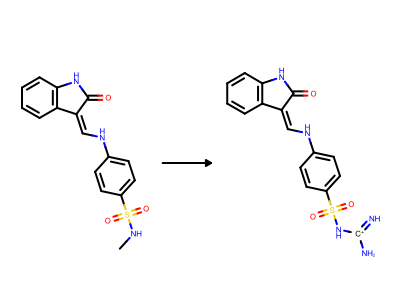

In [62]:
Image(data=oedepict.OEWriteImageToString('png',img))